In [2]:
import os
os.chdir('/content/drive/MyDrive/Maciej_Zielonka_Senior_Project/Maciej_Zielonka_CPSC_490/src')

# Model Evaluation

Here we will run some evaluation techniques to see which model is best to use for the sake of this project, and which features contribute most to the classification

In [5]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import numpy as np

In [6]:
# # Load the Data
import pandas as pd

features_df = pd.read_csv("features_df.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features.values
y = labels.values

In [7]:
def clf_accuracy(clf, clf_name, x_test, y_test):
  y_pred = clf.predict(x_test)
  disp = metrics.plot_confusion_matrix(clf, x_test, y_test,
                                  display_labels=[0,1],
                                  cmap=plt.cm.Blues)

  print(disp.confusion_matrix)
  print("Accuracy of", clf_name, ":", metrics.accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[35 12]
 [ 8 46]]
Accuracy of Logistic Regression : 0.801980198019802
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.78        47
         1.0       0.79      0.85      0.82        54

    accuracy                           0.80       101
   macro avg       0.80      0.80      0.80       101
weighted avg       0.80      0.80      0.80       101



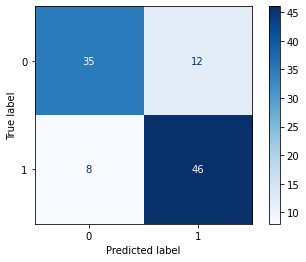

In [8]:
def run_logistic_regression(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Logistic Regression", x_test, y_test)  
  return clf
lr_clf = run_logistic_regression(X, y)

### Random Forest

[[37 10]
 [ 8 46]]
Accuracy of Random Forest : 0.8217821782178217
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        47
         1.0       0.82      0.85      0.84        54

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101



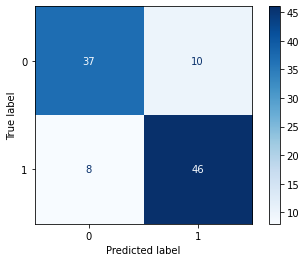

In [12]:
def run_random_forest(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = RandomForestClassifier()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Random Forest", x_test, y_test)
  return clf
tree_clf = run_random_forest(X, y)

### SVM

[[31 16]
 [ 8 46]]
Accuracy of SVM : 0.7623762376237624
              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72        47
         1.0       0.74      0.85      0.79        54

    accuracy                           0.76       101
   macro avg       0.77      0.76      0.76       101
weighted avg       0.77      0.76      0.76       101



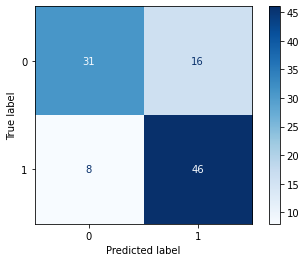

In [13]:
def run_svm(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = svm.SVC(kernel='linear')
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "SVM", x_test, y_test)
  return clf
svm_clf = run_svm(X, y)

### Decision Tree

[[30 17]
 [16 38]]
Accuracy of Decision Tree : 0.6732673267326733
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65        47
         1.0       0.69      0.70      0.70        54

    accuracy                           0.67       101
   macro avg       0.67      0.67      0.67       101
weighted avg       0.67      0.67      0.67       101



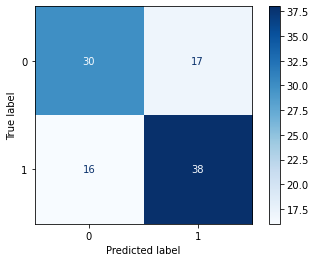

In [10]:
def run_decision_tree(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = tree.DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Decision Tree", x_test, y_test)
  return clf
decision_tree_clf = run_decision_tree(X, y)

### Linear Discriminant Analysis

[[32 15]
 [15 39]]
Accuracy of LDA : 0.7029702970297029
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        47
         1.0       0.72      0.72      0.72        54

    accuracy                           0.70       101
   macro avg       0.70      0.70      0.70       101
weighted avg       0.70      0.70      0.70       101



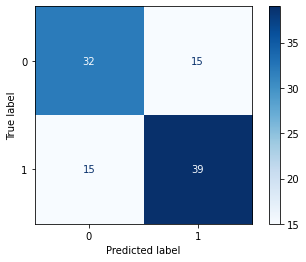

In [11]:
def run_lda(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = LinearDiscriminantAnalysis()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "LDA", x_test, y_test)
  return clf
lda_clf = run_lda(X, y)

### Naive Bayes

[[39  8]
 [21 33]]
Accuracy of Naive Bayes : 0.7128712871287128
              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73        47
         1.0       0.80      0.61      0.69        54

    accuracy                           0.71       101
   macro avg       0.73      0.72      0.71       101
weighted avg       0.73      0.71      0.71       101



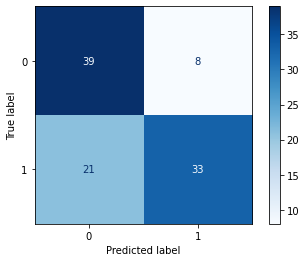

In [13]:
def run_nb(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = GaussianNB()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Naive Bayes", x_test, y_test)
  return clf
lda_clf = run_nb(X, y)

## Feature Engineering

In [21]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
from itertools import product
from sklearn import model_selection
import pandas as pd

names = [
    'Nearest Neighbors', 
    'Linear SVM', 
    'RBF SVM',
    'Gaussian Process', 
    'Decision Tree', 
    'Random Forest', 
    'Neural Net', 
    'AdaBoost', 
    'Naive Bayes', 
    'QDA'
]
classifiers = [
    KNeighborsClassifier(3), # number of neighbors = 3
    SVC(kernel='linear', C=0.025, probability=True), # linear kernel with regularization/misclassification error = 0.025
    SVC(gamma=2, C=0.025, probability=True), # looser SVM with higher regularization
    GaussianProcessClassifier(1.0 * RBF(1.0)), # RBF kernel
    DecisionTreeClassifier(),
    RandomForestClassifier(), # estimators = # of trees in the forest, max_features = # of features to consider when looking for best split
    MLPClassifier(alpha=0.025, max_iter=1000), # multilayer perceptron with L2 penalty/regularization = 1, max_iter = limit as solver iterates until convergence
    AdaBoostClassifier(), 
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.5, random_state=42)

scores = []
accuracy_vals = []
recall_vals = []
specificity_vals = []
precision_vals = []
false_positive_rates = []
false_negative_rates = []
cv_means = []
cv_stds = []
no_skill_aucs = []
logistic_aucs = []
prc_aucs = []
prc_f1_scores = []
lr_precisions = []
lr_recalls = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    scores.append(score)
    
    y_hat = clf.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
    accuracy_vals.append((tn + tp) / (tn + fp + fn + tp))
    recall_vals.append(tp / (fn + tp))
    specificity_vals.append(tn / (tn + fp))
    precision_vals.append(tp / (fp + tp))
    false_positive_rates.append(fp / (tn + fp))
    false_negative_rates.append(fn / (fn + tp))
    # print(classification_report(Y_Test,predictionnb))
    
    kfold = model_selection.KFold(n_splits=10)
    cv_score = model_selection.cross_val_score(clf, X, y, cv=kfold)
    cv_means.append(cv_score.mean() * 100.0)
    cv_stds.append(cv_score.std() * 100.0)
    print(clf)
    lr_probs_roc = clf.predict_proba(X_test)
    ns_probs_roc = [0 for _ in range(len(y_test))]
    lr_probs_roc = lr_probs_roc[:, 1]
    ns_auc_roc = roc_auc_score(y_test, ns_probs_roc)
    lr_auc_roc = roc_auc_score(y_test, lr_probs_roc)
    no_skill_aucs.append(ns_auc_roc)
    logistic_aucs.append(lr_auc_roc)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_roc)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs_roc)
    
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs_roc)
    lr_precisions.append(lr_precision)
    lr_recalls.append(lr_recall)
    lr_f1_prc, lr_auc_prc = f1_score(y_test, y_hat), auc(lr_recall, lr_precision)
    prc_aucs.append(lr_auc_prc)
    prc_f1_scores.append(lr_f1_prc)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    
df_performance = pd.DataFrame({
    'classifier': names, 
    'score': scores, 
    'accuracy': accuracy_vals, 
    'recall': recall_vals,
    'specificity': specificity_vals,
    'precision': precision_vals,
    'FPR': false_positive_rates,
    'FNR': false_negative_rates, 
    'CV-10 mean': cv_means,
    'CV-10 std': cv_stds, 
    'No Skill ROC AUC': no_skill_aucs,
    'Logistic ROC AUC': logistic_aucs,
    'Precision-Recall AUC': prc_aucs,
    'F1': prc_f1_scores
})

df_performance.describe()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in long_scalars


GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min

,score,accuracy,recall,specificity,precision,FPR,FNR,CV-10 mean,CV-10 std,No Skill ROC AUC,Logistic ROC AUC,Precision-Recall AUC,F1
count,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000
mean,0.648214,0.648214,0.729762,0.566667,0.650891,0.433333,0.270238,63.170232,13.961538,0.5,0.704117,0.777441,0.638462
std,0.101461,0.101461,0.285110,0.312672,0.086877,0.312672,0.285110,10.171304,5.242146,0.0,0.142908,0.044678,0.227936
min,0.500000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,45.258467,7.814224,0.5,0.500000,0.734488,0.000000
25%,0.553571,0.553571,0.696429,0.577381,0.651685,0.312500,0.154762,61.624332,9.819148,0.5,0.571854,0.750000,0.667630
50%,0.693452,0.693452,0.797619,0.648810,0.689655,0.351190,0.202381,64.135472,12.638368,0.5,0.763712,0.757393,0.688227
75%,0.720238,0.720238,0.845238,0.687500,0.702128,0.422619,0.303571,70.363191,17.162270,0.5,0.810551,0.800622,0.741076
max,0.750000,0.750000,1.000000,1.000000,0.728571,1.000000,1.000000,74.099822,21.942995,0.5,0.863024,0.873716,0.764045


## Dimensionality Reduction: PCA

In [23]:
pca = PCA(n_components=2, svd_solver='full')
features_pca = pca.fit_transform(X)

[[29 18]
 [15 39]]
Accuracy of Random Forest : 0.6732673267326733
              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64        47
         1.0       0.68      0.72      0.70        54

    accuracy                           0.67       101
   macro avg       0.67      0.67      0.67       101
weighted avg       0.67      0.67      0.67       101

[[ 8 39]
 [ 9 45]]
Accuracy of SVM : 0.5247524752475248
              precision    recall  f1-score   support

         0.0       0.47      0.17      0.25        47
         1.0       0.54      0.83      0.65        54

    accuracy                           0.52       101
   macro avg       0.50      0.50      0.45       101
weighted avg       0.51      0.52      0.47       101

[[23 24]
 [22 32]]
Accuracy of Decision Tree : 0.5445544554455446
              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50        47
         1.0       0.57      0.59      0.58      

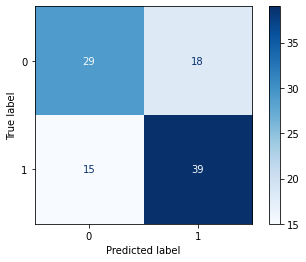

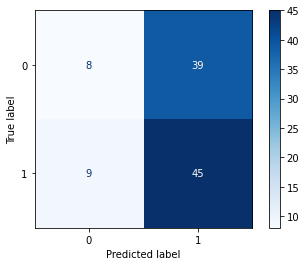

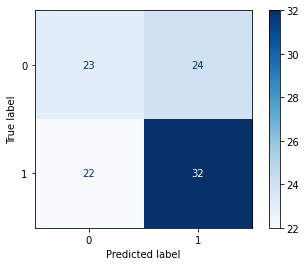

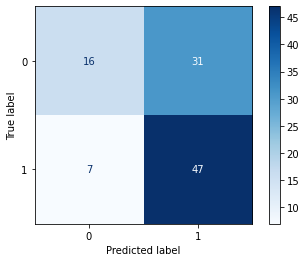

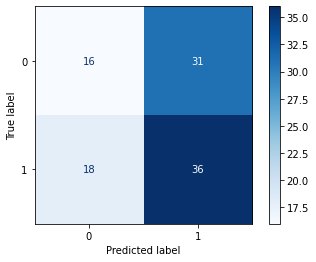

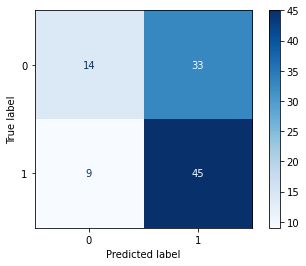

In [24]:
pca_rf_clf = run_random_forest(features_pca, labels)
pca_svm_clf = run_svm(features_pca, labels)
pca_dt_clf = run_decision_tree(features_pca, labels)
pca_nb_clf = run_nb(features_pca, labels)
pca_lda_clf = run_lda(features_pca, labels)
pca_lr_clf = run_logistic_regression(features_pca, labels)

Running the classifier on PCA-reduced features doesn't work as well

# Feature Selection

Here we run a few feature selection techniques to see which features contribute most

In [7]:
import pandas as pd
import numpy as np

features_df = pd.read_csv("features_df.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features
y = labels

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# apply SelectKBest class to extract top 10 best features
chi_selector = SelectKBest(score_func=chi2, k=10)

X_norm = MinMaxScaler().fit_transform(X)
fit_norm = chi_selector.fit(X_norm,y)
dfcolumns = pd.DataFrame(X.columns)
dfscores_norm = pd.DataFrame(fit_norm.scores_)
chi_support = chi_selector.get_support()

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores_norm],axis=1)
featureScores.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Normalized Score'))  # print 10 best features'''

        Features  Normalized Score
26      rms mean         11.451928
27       rms std         11.010083
42       mel std         10.668672
41      mel mean         10.042008
16  mfccs 8 mean          5.710040
0   mfccs 0 mean          5.499366
18  mfccs 9 mean          5.338274
15   mfccs 7 std          4.978362
21  mfccs 10 std          3.591974
17   mfccs 8 std          3.434053


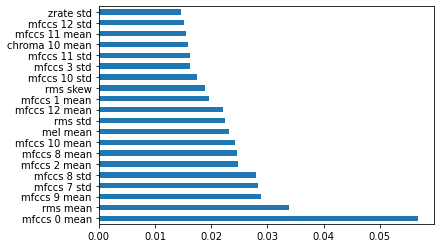

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, y)

# plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')
plt.show()

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

featureScores = pd.DataFrame({'feature': rfe_feature, 'score': rfe_selector.estimator_.coef_[0]})
print(featureScores)

Fitting estimator with 68 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 18 features.
         feature     score
0    mfccs 4 std  0.105749
1    mfccs 5 std -0.020928
2    mfccs 7 std  0.089139
3    mfccs 8 std  0.087846
4   mfccs 9 mean  0.085311
5   mfccs 10 std  0.106423
6   mfccs 11 std -0.106058
7  mfccs 12 mean  0.099295
8       rms skew -0.373043
9      cent skew  0.387617


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr_selector = SelectFromModel(estimator=LogisticRegression(penalty='l2', solver='newton-cg'), max_features=10)
lr_selector.fit(X, y)
lr_support = lr_selector.get_support()
lr_feature = X.loc[:,lr_support].columns.tolist()

allFeatureScores = pd.DataFrame({'feature': X.columns, 'score': lr_selector.estimator_.coef_[0]})
featureScores = allFeatureScores.loc[allFeatureScores.feature.isin(lr_feature)]

print(featureScores)

           feature     score
22   mfccs 11 mean -0.273078
28        rms skew -0.619453
34       cent skew  0.379641
44   chroma 0 mean  0.437034
45    chroma 0 std  0.541022
46   chroma 1 mean -0.358017
51    chroma 3 std -0.589494
53    chroma 4 std -0.316170
55    chroma 5 std  0.891441
64  chroma 10 mean  0.304131


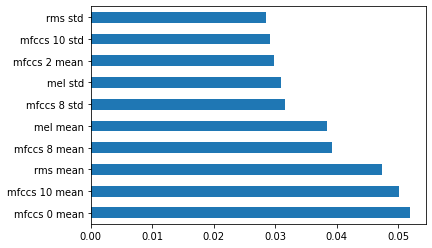

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
rf_selector.fit(X, y)
rf_support = rf_selector.get_support()
rf_feature = X.loc[:,rf_support].columns.tolist()
#print(rf_feature)

model = RandomForestClassifier()
model.fit(X, y)
#print(model.feature_importances_)

# plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

In [31]:
num_feats = 10 # number of features to select
pearson_corrs = []
feature_names = X.columns.tolist()

# calculate the correlation of each feature with target
for f in feature_names:
    pearson_corr = np.corrcoef(X[f], y)[0, 1]
    pearson_corrs.append(pearson_corr)

# replace NaN with 0
pearson_corrs = [0 if np.isnan(i) else i for i in pearson_corrs]

# feature name
selected_features = X.iloc[:,np.argsort(np.abs(pearson_corrs))[-num_feats:]].columns.tolist()

# feature support
cor_support = [True if i in selected_features else False for i in feature_names]

# feature selection
allFeatureScores = pd.DataFrame({'feature': X.columns, 'score': pearson_corrs})
featureScores = allFeatureScores.loc[allFeatureScores.feature.isin(selected_features)]

print(featureScores)

          feature     score
0    mfccs 0 mean  0.473975
4    mfccs 2 mean -0.381221
15    mfccs 7 std  0.432659
16   mfccs 8 mean  0.431784
17    mfccs 8 std  0.390166
18   mfccs 9 mean  0.452227
21   mfccs 10 std  0.392647
24  mfccs 12 mean  0.374142
26       rms mean  0.439127
27        rms std  0.382410


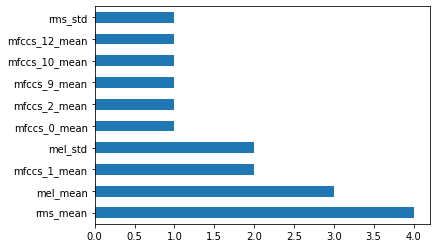

In [32]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

# hm... why is everything 0?
X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]
lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X, y)

lgb_selector = SelectFromModel(lgbc, max_features=10)
lgb_selector.fit(X, y)
lgb_support = lgb_selector.get_support()
lgb_feature = X.loc[:,lgb_support].columns.tolist()

importances = pd.Series(lgbc.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


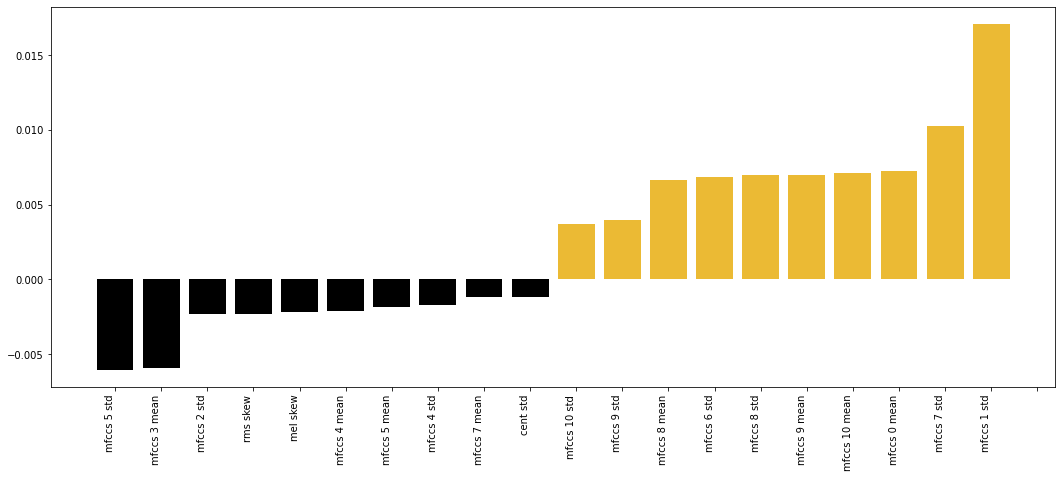

In [33]:
from sklearn import svm
import matplotlib.pyplot as plt

def feature_plot(classifier, feature_names, top_features=4):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['#000000' if c < 0 else '#ebba34' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.show()

trainedsvm = svm.LinearSVC().fit(X, y)
feature_plot(
    trainedsvm,
    features_df.drop(['Unnamed: 0', 'Engaged'], axis = 1).columns.values, 
    10
)

In [34]:
num_feats = 10
# put all selection together
feature_selection_df = pd.DataFrame(
    {'Feature': X.columns, 
     'Pearson': cor_support, 
     'Chi-2': chi_support, 
     'RFE': rfe_support, 
     'Logistics': lr_support,
     'Random Forest': rf_support, 
     'LightGBM': lgb_support
    })

# count the selected times for each feature
feature_selection_df['Count'] = np.sum(feature_selection_df, axis=1)

# display
feature_selection_df = feature_selection_df.sort_values(['Count', 'Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
feature_selection_df.head(20)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Count
1,mfccs_9_mean,True,True,True,False,True,True,5
2,rms_mean,True,True,False,False,True,True,4
3,mfccs_8_std,True,True,True,False,True,False,4
4,mfccs_7_std,True,True,True,False,True,False,4
5,mfccs_10_std,True,True,True,False,True,False,4
6,mfccs_0_mean,True,True,False,False,True,True,4
7,rms_std,True,True,False,False,False,True,3
8,mfccs_8_mean,True,True,False,False,True,False,3
9,mfccs_12_mean,True,False,True,False,False,True,3
10,mel_mean,False,True,False,False,True,True,3


        Features  Normalized Score
0   mfccs 0 mean         54.880593
26      rms mean         51.637350
18  mfccs 9 mean         46.773701
27       rms std         39.894529
15   mfccs 7 std         39.168532
16  mfccs 8 mean         38.303079
4   mfccs 2 mean         35.583309
17   mfccs 8 std         28.198883
23  mfccs 11 std         26.060780
14  mfccs 7 mean         24.944665


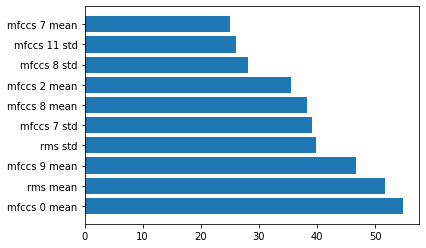

In [8]:
# Anova for feature selection

from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5) 
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fs.scores_)
fs_support = fs.get_support()

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
n_largest = featureScores.nlargest(10, 'Normalized Score')
print(n_largest)
# n_largest['Normalized Score'].values
pyplot.barh([i for i in range(len(n_largest))], n_largest['Normalized Score'].values, tick_label=n_largest['Features'].values)
pyplot.show()

         Features  Normalized Score
0    mfccs 0 mean         49.280580
18   mfccs 9 mean         44.444861
26       rms mean         39.902593
16   mfccs 8 mean         39.192581
15    mfccs 7 std         39.062353
21   mfccs 10 std         31.789145
17    mfccs 8 std         30.559484
4    mfccs 2 mean         29.527696
27        rms std         28.353720
24  mfccs 12 mean         28.302763


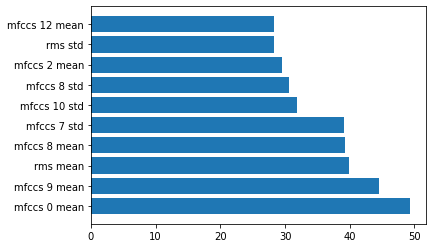

In [15]:
# Run ANoVa 100 times and average the results

from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

features_df = pd.read_csv("features_df.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features
y = labels
 
featureScores = pd.DataFrame()
iterations = 100
for i in range(iterations):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5) 
  fs = SelectKBest(score_func=f_classif, k=10)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  dfcolumns = pd.DataFrame(X.columns)
  dfscores = pd.DataFrame(fs.scores_)
  fs_support = fs.get_support()

  # concat two dataframes for better visualization 
  temp = pd.concat([dfcolumns, dfscores],axis=1)
  temp.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
  if featureScores.empty:
    featureScores = temp
  else:
    featScores_values = featureScores['Normalized Score'].values
    temp_values = temp['Normalized Score'].values
    arr = featScores_values + temp_values
    dfscores = pd.DataFrame(arr)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Normalized Score']

featureScores.columns = ['Features', 'Normalized Score']
n_largest = featureScores.nlargest(10, 'Normalized Score')
avg_values = n_largest['Normalized Score'].values 
avg_values /= iterations
print(n_largest)
pyplot.barh([i for i in range(len(n_largest))], n_largest['Normalized Score'].values, tick_label=n_largest['Features'].values)
pyplot.show()

We clearly see that MFCCS and RMS contribute most to the model, how well does our model perform if we just use the top ten features?

In [16]:
top_ten_df = pd.DataFrame()
arr = []
for feature in n_largest['Features']:
    arr.append(X[feature].values)
arr = np.array(arr).T
reduced_X = pd.DataFrame(arr, columns=n_largest['Features'].values)

[[40  7]
 [12 42]]
Accuracy of Random Forest : 0.8118811881188119
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81        47
         1.0       0.86      0.78      0.82        54

    accuracy                           0.81       101
   macro avg       0.81      0.81      0.81       101
weighted avg       0.82      0.81      0.81       101



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

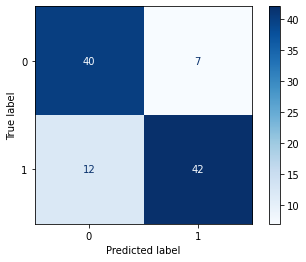

In [23]:
run_random_forest(reduced_X, y)

Comparable results! That's very good to see

[[37 10]
 [11 43]]
Accuracy of SVM : 0.7920792079207921
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        47
         1.0       0.81      0.80      0.80        54

    accuracy                           0.79       101
   macro avg       0.79      0.79      0.79       101
weighted avg       0.79      0.79      0.79       101



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

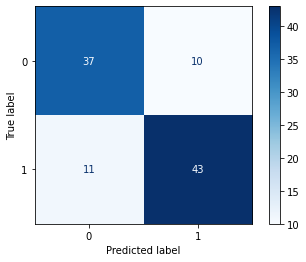

In [26]:
run_svm(reduced_X, y)

Even the SVM performs well

### Correlation Map

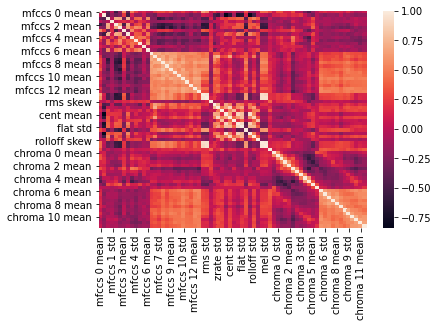

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt

orig_corr_matrix = X.corr()
sns.heatmap(orig_corr_matrix)


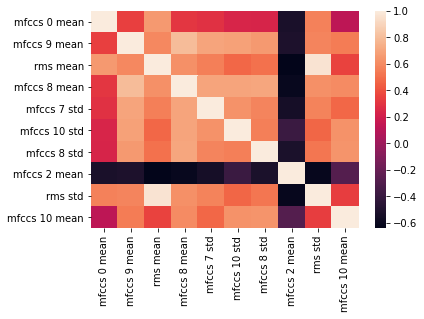

In [33]:
reduced_corr_matrix = reduced_X.corr()
sns.heatmap(reduced_corr_matrix)

We see relatively low correlation between the top features

Ok, so we know MFCCS contribute most, but we already knew that from past literature. We see also rms, which wasn't mentioned in too many papers. What else is important?

In [34]:
# Run ANoVa 100 times and average the results

from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

features_df = pd.read_csv("features_df.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features
y = labels
 
featureScores = pd.DataFrame()
iterations = 100
for i in range(iterations):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5) 
  fs = SelectKBest(score_func=f_classif, k="all")
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  dfcolumns = pd.DataFrame(X.columns)
  dfscores = pd.DataFrame(fs.scores_)
  fs_support = fs.get_support()

  # concat two dataframes for better visualization 
  temp = pd.concat([dfcolumns, dfscores],axis=1)
  temp.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
  if featureScores.empty:
    featureScores = temp
  else:
    featScores_values = featureScores['Normalized Score'].values
    temp_values = temp['Normalized Score'].values
    arr = featScores_values + temp_values
    dfscores = pd.DataFrame(arr)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Normalized Score']

featureScores.columns = ['Features', 'Normalized Score']
biggest_contributors = featureScores.sort_values(by=['Normalized Score'], ascending=False)
avg_values = biggest_contributors['Normalized Score'].values 
avg_values /= iterations
pd.set_option('display.max_rows', None)
biggest_contributors

,Features,Normalized Score
0,mfccs 0 mean,46.474511
18,mfccs 9 mean,44.290741
16,mfccs 8 mean,39.503282
26,rms mean,39.409405
15,mfccs 7 std,39.080384
21,mfccs 10 std,32.731465
17,mfccs 8 std,30.733043
4,mfccs 2 mean,28.909751
24,mfccs 12 mean,28.901825
27,rms std,28.589529
